# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie _The Image Processing Handbook_, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz _lenaRGBSzum.png_ (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
   - Obliczanie różnicy: `window - window[rowWin, colWin]`.
   - Obliczanie kwadratów: `np.square`.
   - Obliczanie pierwiastka: `np.sqrt`.
   - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
   Wykorzystaj funkcję `np.argmin`.
   Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
   Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.


In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
    if not os.path.exists(fileName):
        r = requests.get(url + fileName, allow_redirects=True)
        open(fileName, 'wb').write(r.content)

In [2]:
def read_color_image(filename):
    image = cv2.imread(filename)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


lena = read_color_image('lenaRGB.png')

In [3]:
def colorful_median(img: np.ndarray, window_size: int):
    def dist(window, pixel):
        d = window.astype(np.int32) - pixel.astype(np.int32)
        d = np.square(d)
        d = np.sum(d)
        d = np.sqrt(d)
        return d

    n, m = img.shape[0], img.shape[1]
    ws = window_size // 2
    filtered = np.copy(img)

    for i in range(ws, n-ws):
        for j in range(ws, m-ws):
            window = img[i-ws:i+ws+1, j-ws:j+ws+1]
            distances = np.zeros(
                (window_size, window_size), dtype=np.float32)
            for k in range(i-ws, i+ws):
                for l in range(j-ws, j+ws):
                    distances[k-i+ws][l-j+ws] = dist(window, img[k][l])

            closest_idx = np.unravel_index(
                np.argmin(distances), (window_size, window_size))
            filtered[i][j] = window[closest_idx]

    return filtered

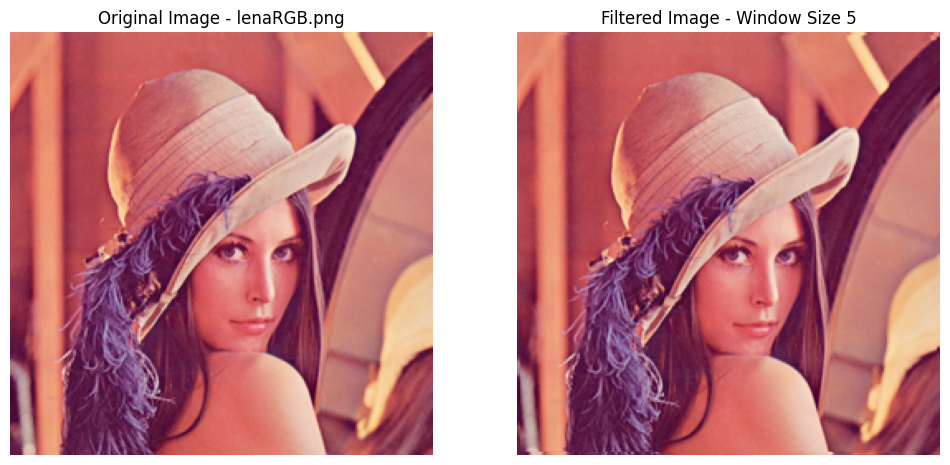

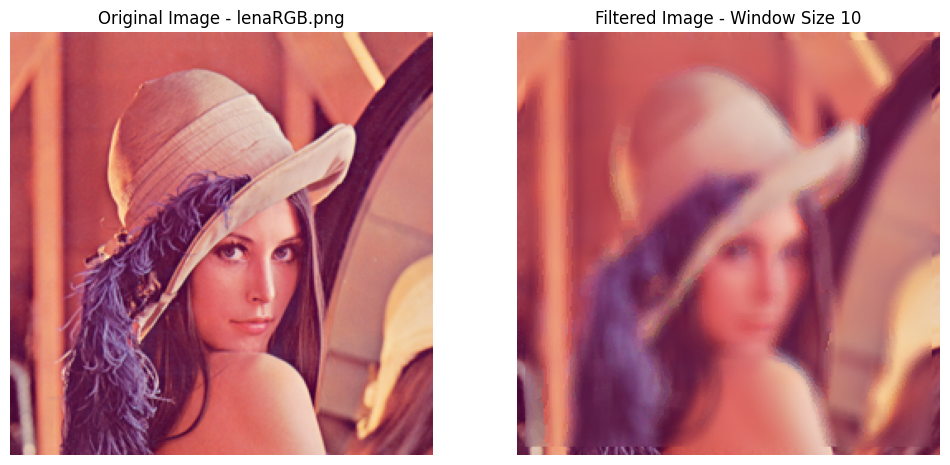

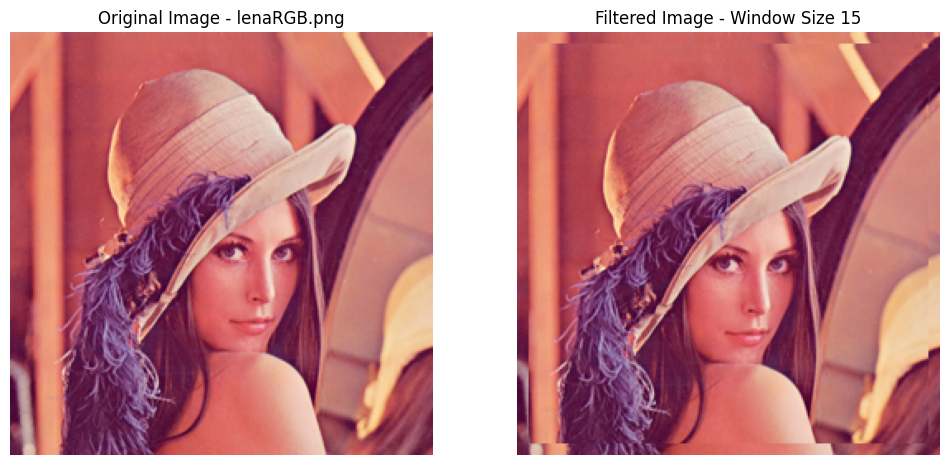

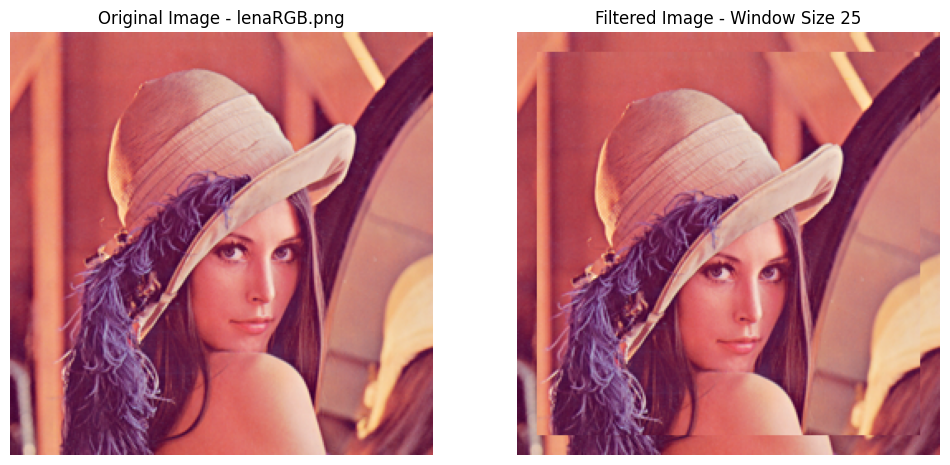

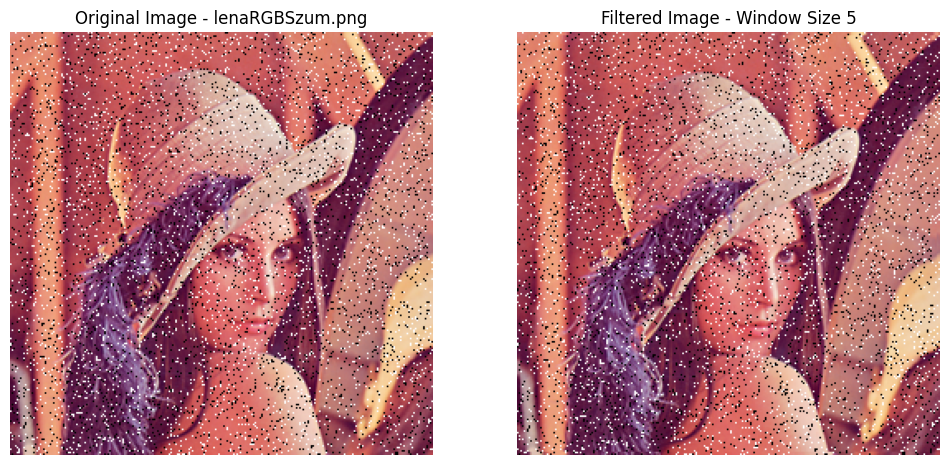

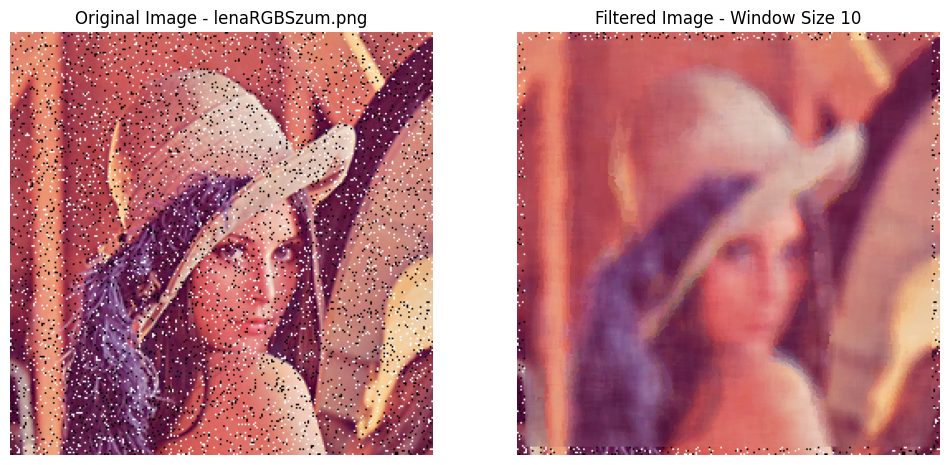

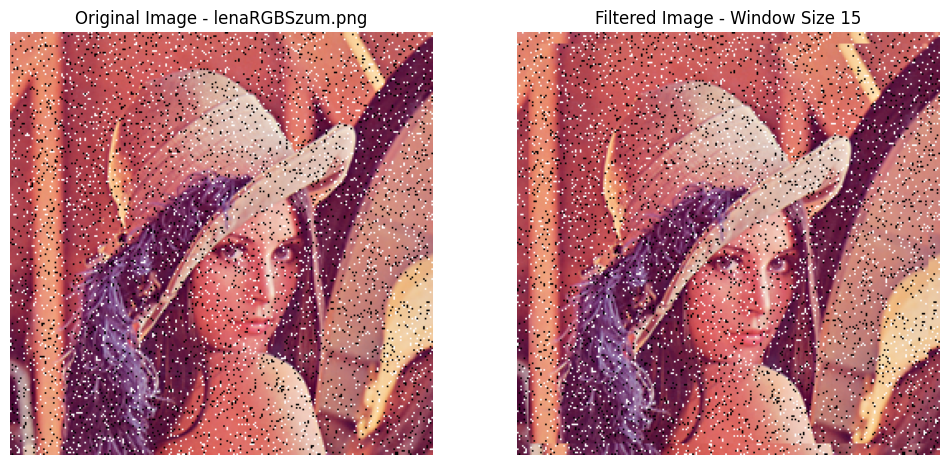

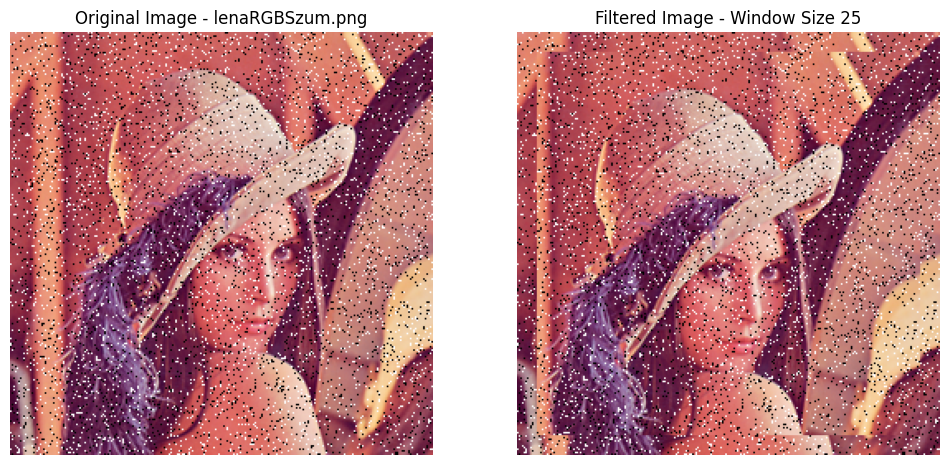

In [4]:
def compare_images(images, window_sizes):
    for image_name in images:
        img = read_color_image(image_name)
        for window_size in window_sizes:
            filtered_img = colorful_median(img, window_size)
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.axis('off')
            plt.title(f"Original Image - {image_name}")
            plt.imshow(img)
            plt.subplot(1, 2, 2)
            plt.title(f"Filtered Image - Window Size {window_size}")
            plt.axis('off')
            plt.imshow(filtered_img)
            plt.show()


compare_images(['lenaRGB.png', 'lenaRGBSzum.png'], [5, 10, 15, 25])